In [3]:
import matplotlib.pyplot as plt
import numpy as np

from slap2_utils.datafile import DataFile
from slap2_utils.subclasses.metadata import MetaData
from slap2_utils.utils.trace import Trace



MetaData Loaded
[[ 155765  155766  155767 ...  914610  914611  914612]
 [1179765 1179766 1179767 ... 1881009 1881010 1881011]]
[58.195065 58.04783  56.610817 ... 27.02295  29.746092 34.00862 ]


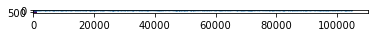

In [10]:
hDataFile = DataFile('../Tadpole2_20230829_183310_DMD2.dat');
roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[0].shapeData

#metaData.AcquisitionContainer.ROIs[0].shapeData
zIdx = 1;
chIdx = 1;
hTrace = Trace(hDataFile,zIdx,chIdx);


from skimage.draw import polygon_perimeter

roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[0].shapeData

img = np.zeros((800, 1280), dtype=np.uint8)

rr, cc = polygon_perimeter(roi_shape[0,:], roi_shape[1,:],

                           shape=img.shape, clip=True)

img[rr, cc] = 1

plt.imshow(img)

#rasterPixels = pixelMask;
#integrationPixels = pixelMask;

pixelMask=np.full((800, 1280), False)
pixelMask[img==1] = True

rasterPixels = np.full((800, 1280), False)
integrationPixels = pixelMask;

hTrace.setPixelIdxs(rasterPixels, integrationPixels);
#windowWidth_lines = 10;
#expectedWindowWidth_lines = 100;
#trace = hTrace.process(windowWidth_lines,expectedWindowWidth_lines);
_trace, _, _, _ = hTrace.process(10, 100)
print(_trace)
plt.plot(_trace)

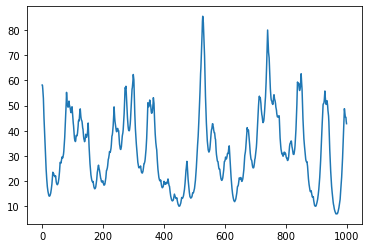

In [11]:
plt.plot(_trace[:1000])

Raster


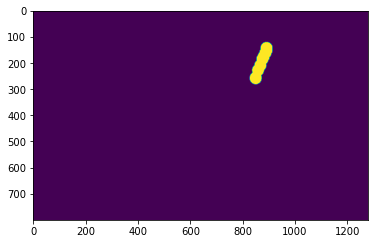

In [3]:
testMeta = MetaData('TestData/Tadpole2_20230829_183310_DMD2.meta')
roi_shape = testMeta.AcquisitionContainer.ROIs[2].shapeData
print(testMeta.AcquisitionContainer.ROIs[2].imageMode)


img = np.zeros((800, 1280), dtype=np.uint8)

rr, cc = polygon_perimeter(roi_shape[0,:], roi_shape[1,:],

                           shape=img.shape, clip=True)
img[rr, cc] = 1

plt.imshow(img)


In [4]:
print(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan']['sliceIdx'])
(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan']['superPixelID'])

[array([0, 1], dtype=uint64), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint32), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0

[array([0, 1], dtype=uint64),
 array([[1544542, 1541981, 1539420, 1512539, 1508698, 1485657, 1481816,
         1477975, 1476694, 1474133, 1472852, 1442131, 1438290, 1435729,
         1431887, 1430606, 1429325, 1428044, 1413963, 1407562, 1405001,
         1402440, 1399879, 1398598, 1397317, 1396036, 1394755, 1378114,
         1376833, 1375552, 1374271, 1371710, 1370429, 1366588, 1362747,
         1360186, 1358905, 1337144, 1332023, 1329462, 1326901, 1324340,
         1311538, 1308977, 1306416, 1292335, 1283374, 1279533, 1275692,
         1271851, 1269290, 1266729, 1264168, 1262887, 1261606, 1260325,
         1259044, 1259043, 1257762, 1256481, 1256480, 1255199, 1255198,
         1255197, 1253916, 1253915, 1253914, 1253913, 1252632, 1252631,
         1252630, 1252629, 1252628, 1253907, 1253906, 1253905, 1253904,
         1253903, 1255182, 1255181, 1256460, 1256459, 1257738, 1257737,
         1259016, 1260295, 1261574, 1262853, 1264132, 1265411, 1267970,
         1269249, 1273088, 1278207

In [5]:
hDataFile.zPixelReplacementMaps

array([[1179765, 1179766, 1179767, ..., 1938610, 1938611, 1938612],
       [1179765, 1179766, 1179767, ..., 1881009, 1881010, 1881011]],
      dtype=uint32)

In [ ]:
hDataFile.header['linesPerCycle']

In [ ]:
print(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan'][6:9])
(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan'][9:13])